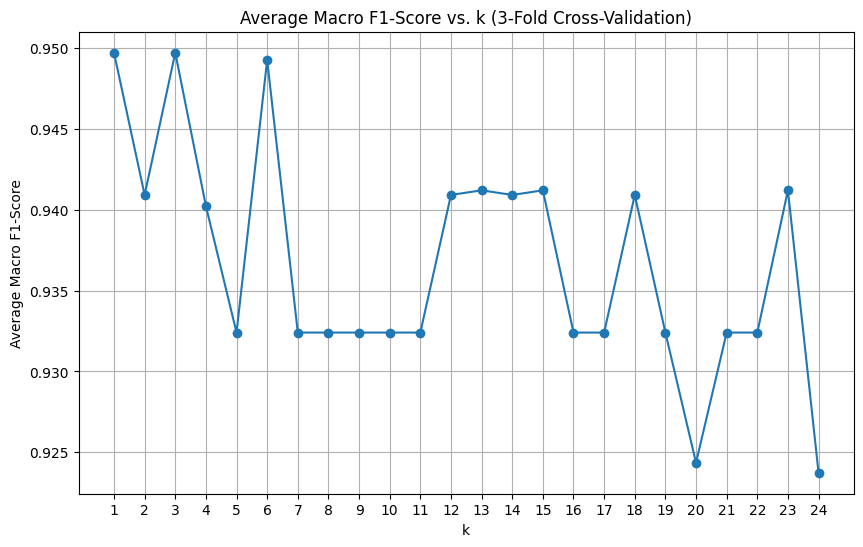

Best k: 1
Best Macro F1-Score: 0.9497


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import make_scorer, f1_score

# Load the Iris dataset 
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the range of k values to test
k_values = range(1, 25)

# Initialize lists to store cross-validation scores
cv_scores = []

# Create a scorer for macro f1-score
macro_f1 = make_scorer(f1_score, average='macro')

# Perform 3-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring=macro_f1)
    cv_scores.append(np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-')
plt.title('Average Macro F1-Score vs. k (3-Fold Cross-Validation)')
plt.xlabel('k')
plt.ylabel('Average Macro F1-Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find and print the best k
best_k = k_values[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f"Best k: {best_k}")
print(f"Best Macro F1-Score: {best_score:.4f}")